
# <span style="color:rgb(213,80,0)">Sensistivity curve for the Income data.</span>

This file creates Figure 2.1.

## Create input for Figure 2.1

Load the data


In [1]:
load Income1;
% Just use the first 11 observations
y=Income1{1:11,"HTOTVAL"};

% SC for mean, median and trimmed mean
% Just use the first 11 observations
logy11=log(y(1:11));
alpha=0.10;
% useMATLABtrimmean = Boolean which specifies whether to use MATLAB
% function trimmean or not
useMATLABtrimmean=false;

% Compute median, mean and trimmed mean for all the observations
medy=median(logy11);
meany=mean(logy11);
if useMATLABtrimmean==true
    trimean=trimmean(logy11,100*(alpha*2),'floor');
else
    trimean=trimmeanFS(logy11,alpha);
end

% Value which has to be added to compute the sensitivity curve
x=(9:0.01:14)';

% Txnmean, Txnmed and Txntrimmean will contain the value of the sensitivity
% curve based on y and x(i) i=1, 2, ..., length(x)
Txnmean=zeros(length(x),1);
Txnmed=Txnmean;
Txntrimmean=Txnmean;
for i=1:length(x)
    Txnmean(i)=mean([logy11;x(i)]);
    Txnmed(i)=median([logy11;x(i)]);
    if useMATLABtrimmean==true
        Txntrimmean(i)=trimmean([logy11;x(i)],20,'floor');
    else
        Txntrimmean(i)=trimmeanFS([logy11;x(i)],0.10);
    end
end

n11=length(logy11);
Scurvmean=(n11+1)*(Txnmean-meany);
Scurvmedian=(n11+1)*(Txnmed-medy);
Scurvtrimmean=(n11+1)*(Txntrimmean-trimean);

## Create Figure 2.1


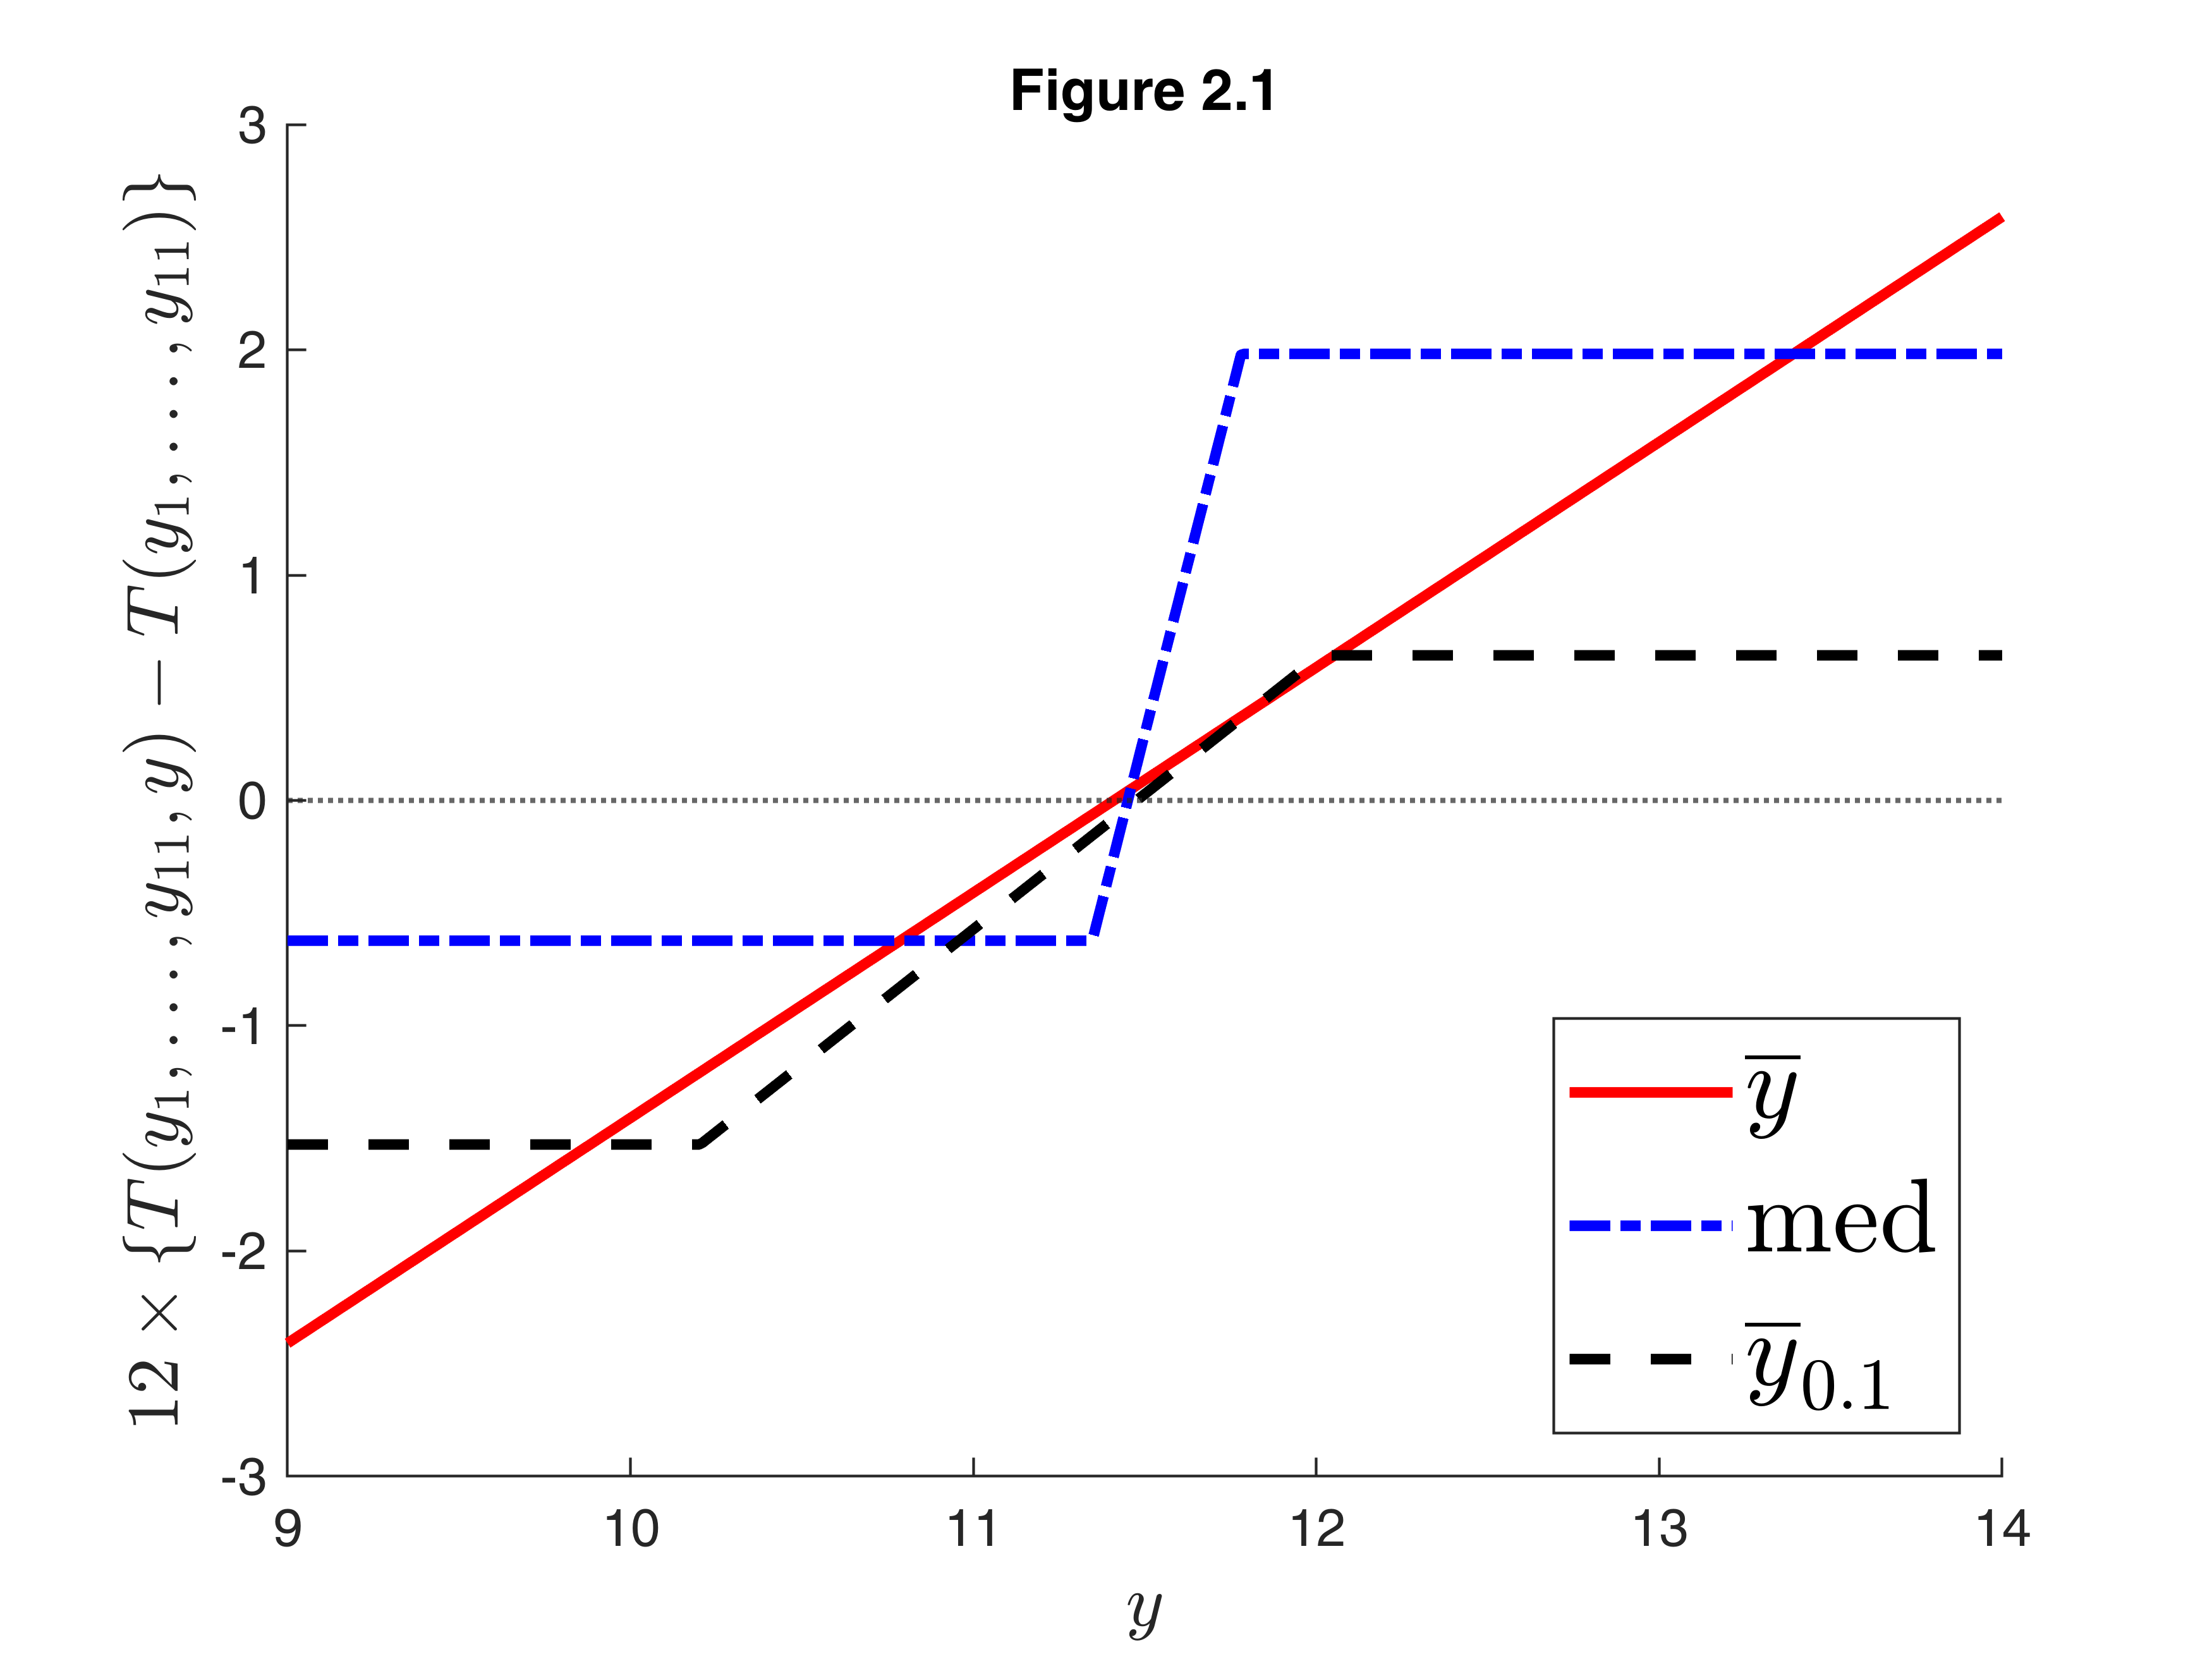

In [2]:
figure
FontSize=14;
LineWidth=2;
hold('on')
plot(x,Scurvmean,'Color','r','LineStyle','-','LineWidth',LineWidth)
plot(x,Scurvmedian,'Color','b','LineStyle','-.','LineWidth',LineWidth)
plot(x,Scurvtrimmean,'Color','k','LineStyle','--','LineWidth',LineWidth)
xlabel(' $y$ ','Interpreter','latex','FontSize',FontSize)
ylabel(' $12 \times \left\{ T(y_1,\ldots, y_{11}, y) - T(y_1, \ldots, y_{11}) \right\}$ ',...
    'Interpreter','latex','FontSize',FontSize)
% title('Sensitivity curve')
ax=axis;
% add an horizontal line passing through 0
yline(0,'LineStyle',':','LineWidth',1)
% add legend
legend({' $\overline y$ ' 'med' ' $\overline y_{0.1}$ '},'FontSize',20,'Location','southeast','Interpreter','latex')
prin=0;
if prin==1
    % print to postscript
    print -depsc SC.eps;
else
    title('Figure 2.1')
    set(gcf,"Name",'Figure 2.1')
end

In [3]:

%InsideREADME